# Supervised Learning Capstone: Wine Quality

Describe your data set. Describe and explore your data set in the initial section of your Report. What does your data contain and what is its background? Where does it come from? Why is it interesting or significant? Conduct summary statistics and produce visualizations for the particular variables from the data set that you will use.

### Introduction

This data is extracted from __[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)__ It contains characteristics of various red and white wines and the quality of the wine.

### Research Interest

<b>Objective:</b> To combine the datasets of red and white wine and use build models that predict if the wine is low tier, mid tier, or high tier. 

<b>Original Features:</b>
-  fixed acidity
-  volatile acidity
-  citric acid
-  residual sugar
-  chlorides
-  free sulfur dioxide
-  total sulfur dioxide
-  density
-  pH
-  sulphates
-  alcohol
-  quality:  (score between 0 and 10)
-  winetype: red(1) or white(2) wine

Note: "winetype" was manually added through Excel. I also changed the separator from ";" to ",". 

### Modules and Data Loading

In [1]:
#Import modules
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#red wine dataset
df1 = pd.read_csv((r"C:\Users\genta\Desktop\Thinkful\SupervisedLearning\SupervisedLearningCapstone\winequality-red.csv"))

#white wine dataset
df2 = pd.read_csv((r"C:\Users\genta\Desktop\Thinkful\SupervisedLearning\SupervisedLearningCapstone\winequality-white.csv"))

In [3]:
#combine both red and white wine datasets into 1 dataframe. 
df = pd.concat([df1, df2] )


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'winetype'],
      dtype='object')

### Combine both red and white wine datasets into 1 dataframe. 

#combine both red and white wine datasets into 1 dataframe. 
df = pd.concat([df1, df2] )


In [5]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,2
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,2
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,2
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,2


<b>Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
winetype                  int64
dtype: object

<b>This dataset contains 13 features. Of those 13 features, 11 are floats and 2 are integers. 

In [7]:
#Find null values
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
winetype                0
dtype: int64


<b>There are no null values in this dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
winetype                6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,1.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,2.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,2.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,2.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,2.000000


### Set wine tiers

<b>I want to group the quality column into three tiers, low, mid, high.  

In [10]:
set(df['quality'])

{3, 4, 5, 6, 7, 8, 9}

In [11]:
#Group the quality into groups
df['quality'] = pd.cut(df['quality'],
                         [0,3,7,10],
                         labels=['low','mid','high'])

In [12]:
set(df['quality'])

{'high', 'low', 'mid'}

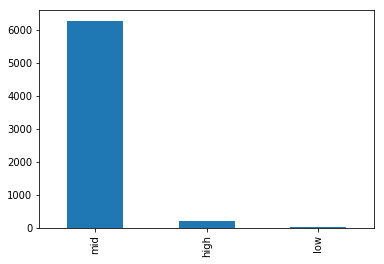

In [13]:
df['quality'].value_counts().plot.bar()

In [14]:
df['quality'].value_counts()

mid     6269
high     198
low       30
Name: quality, dtype: int64

### Visualizations

Text(0.5, 1.0, 'Wine Variables Correlations')

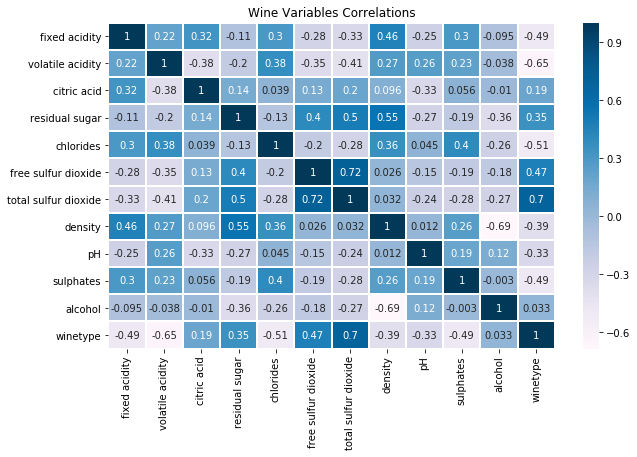

In [15]:
#Correlations

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap = 'PuBu',linewidth = 1,annot= True, annot_kws={"size": 10})
plt.title('Wine Variables Correlations')

### Modeling

<b>Model your outcome of interest. You should try several different approaches and really work to tune a variety of models before using the model evaluation techniques to choose what you consider to be the best performer. Make sure to think about explanatory versus predictive power and experiment with both.

<b>Things to address:

-  A specified research question your model addresses
-  How you chose your model specification and what alternatives you compared it to
-  The practical uses of your model for an audience of interest
-  Any weak points or shortcomings of your model

#### A specified research question your model addresses
    
My model will address the question of using the various characteristic of the wine to predict the quality of the wine. I want to create a model that accurately predicts if a wine is bad, ok, or good. I will test multiple models and compare them against each other so which one best predicts the wine's quality. 

### Setup for Modeling

In [16]:
#Setup X and y


X= df.drop(['quality'],1)
y=df['quality']


In [17]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state= 50)


In [18]:
y_test.value_counts()

mid     1248
high      45
low        7
Name: quality, dtype: int64

### Modeling

<b>How you chose your model specification and what alternatives you compared it to?</b>



In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
#print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

print("Logistic Regression Accuracy Score:",lr_acc_score*100)
print("Logistic Regression Confusion Matrix:\n",lr_conf_matrix)
print("Cross Validation scores:\n", cross_val_score(lr,X_train, y_train, cv=10, scoring='accuracy'))

Logistic Regression Accuracy Score: 96.0
Logistic Regression Confusion Matrix:
 [[   0    0   45]
 [   0    0    7]
 [   0    0 1248]]
Cross Validation scores:
 [0.96360153 0.96353167 0.96353167 0.9672447  0.9672447  0.9672447
 0.9672447  0.9672447  0.9672447  0.9672447 ]


In [20]:
# Print 10 results
for i in range(0,10):
    print('Actual wine quality is ', y_test.iloc[i], ' and predicted is ', lr_predict[i])

Actual wine quality is  mid  and predicted is  mid
Actual wine quality is  mid  and predicted is  mid
Actual wine quality is  mid  and predicted is  mid
Actual wine quality is  mid  and predicted is  mid
Actual wine quality is  mid  and predicted is  mid
Actual wine quality is  mid  and predicted is  mid
Actual wine quality is  mid  and predicted is  mid
Actual wine quality is  mid  and predicted is  mid
Actual wine quality is  high  and predicted is  mid
Actual wine quality is  high  and predicted is  mid


In [21]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=400, random_state = 50)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
#Check accuracy
print("Random Forest Accuracy Score:", accuracy_score(y_test,pred_rfc )*100)
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test,pred_rfc))

print("Cross Validation scores:\n", cross_val_score(rfc,X_train, y_train, cv=10, scoring='accuracy'))

Random Forest Accuracy Score: 97.0
Random Forest Confusion Matrix:
 [[  13    0   32]
 [   0    0    7]
 [   0    0 1248]]
Cross Validation scores:
 [0.97318008 0.97120921 0.96737044 0.98265896 0.97302505 0.97109827
 0.97495183 0.97109827 0.97495183 0.97687861]


In [22]:
# Print 10 results
for i in range(0,10):
    print('Actual wine quality is ', y_test.iloc[i], ' and predicted is ', pred_rfc[i])

Actual wine quality is  mid  and predicted is  mid
Actual wine quality is  mid  and predicted is  mid
Actual wine quality is  mid  and predicted is  mid
Actual wine quality is  mid  and predicted is  mid
Actual wine quality is  mid  and predicted is  mid
Actual wine quality is  mid  and predicted is  mid
Actual wine quality is  mid  and predicted is  mid
Actual wine quality is  mid  and predicted is  mid
Actual wine quality is  high  and predicted is  mid
Actual wine quality is  high  and predicted is  mid


In [23]:
#Support vector
from sklearn.svm import SVC
svc = SVC(gamma='scale')
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print("Support Vector Accuracy Score:",svc.score(X_train, y_train)*100)
print("Support Vector Confusion Matrix:\n", confusion_matrix(y_test,pred_svc))
print("Cross Validation scores:\n", cross_val_score(svc,X_train, y_train, cv=10, scoring='accuracy'))

Support Vector Accuracy Score: 96.63267269578603
Support Vector Confusion Matrix:
 [[   0    0   45]
 [   0    0    7]
 [   0    0 1248]]
Cross Validation scores:
 [0.96360153 0.96353167 0.96353167 0.9672447  0.9672447  0.9672447
 0.9672447  0.9672447  0.9672447  0.9672447 ]


In [24]:
# Print 10 results to see
for i in range(0,10):
    print('Actual wine quality is', y_test.iloc[i], 'and predicted is', pred_svc[i])

Actual wine quality is mid and predicted is mid
Actual wine quality is mid and predicted is mid
Actual wine quality is mid and predicted is mid
Actual wine quality is mid and predicted is mid
Actual wine quality is mid and predicted is mid
Actual wine quality is mid and predicted is mid
Actual wine quality is mid and predicted is mid
Actual wine quality is mid and predicted is mid
Actual wine quality is high and predicted is mid
Actual wine quality is high and predicted is mid


In [28]:
from sklearn import ensemble

gbc = ensemble.GradientBoostingClassifier(n_estimators= 500,
          max_depth= 2,
          loss ='deviance')
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)
#Check accuracy
print("Gradient Boosting Classifier Accuracy Score:",accuracy_score(y_test,pred_gbc )*100)
print("Gradient Boosting Classifier Confusion Matrix:\n", confusion_matrix(y_test,pred_gbc))

print("Cross Validation scores:\n", cross_val_score(gbc,X_train, y_train, cv=10, scoring='accuracy'))

Gradient Boosting Classifier Accuracy Score: 96.38461538461539
Gradient Boosting Classifier Confusion Matrix:
 [[  11    0   34]
 [   0    1    6]
 [   3    4 1241]]
Cross Validation scores:
 [0.96168582 0.96545106 0.95777351 0.97302505 0.9672447  0.95761079
 0.96531792 0.96531792 0.97109827 0.96917148]


In [31]:
# Print 10 results to see
for i in range(997,1007):
    print('Actual wine quality is', y_test.iloc[i], 'and predicted is', pred_gbc[i])

Actual wine quality is high and predicted is mid
Actual wine quality is mid and predicted is mid
Actual wine quality is mid and predicted is mid
Actual wine quality is mid and predicted is mid
Actual wine quality is mid and predicted is mid
Actual wine quality is mid and predicted is mid
Actual wine quality is mid and predicted is mid
Actual wine quality is mid and predicted is mid
Actual wine quality is mid and predicted is mid
Actual wine quality is mid and predicted is mid


<b>How you chose your model specification and what alternatives you compared it to?</b>

I chose my main model to be Super Vector Machine. I compared it to 3 other models and chose it because it had a higher accuracy score and more consistence cross-validation scores. 

<b>The practical uses of your model for an audience of interest</b>

The model is of good use to those who make wine. They can understand the elements that go into makine a good wine a little better. They can understand why their wine isn't in the tier that they thought it would be in and use these results to tweak their methods to improve the quality of the wine.

<b>Any weak points or shortcomings of your model</b>

The shortcomings of my model do exist. The first one is in the qualities of the wines recorded. There are only 7 orignal qualities available out of a 10 scale. Also, the numbers per rating are not as even distributed as I'd like for a better modeling. There are way more mid tier wines and while that may be true, it does make my uneasy in predicting.

I also feel as if my model could have used more feature or to better put it more values for the qualities of wine. Maybe the origins of the grapes, years of the wine, and methods used in creation. It it more of a chemical standpoint and I think more is needed to accurately rate the wines. 



-  Genesis Taylor